In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_excel('teachers.xlsx')
df = data.copy()
df.head()

,sector_EN,sector_AR,sex_EN,sex_AR,year,value
0,govermental,حكومي,male,ذكور,1975 / 1974,2083
1,govermental,حكومي,female,إناث,1975 / 1974,1744
2,private,خاص,male,ذكور,1975 / 1974,-
3,private,خاص,female,إناث,1975 / 1974,-
4,govermental,حكومي,male,ذكور,1976 / 1975,2542


In [3]:
df.shape

(160, 6)

In [4]:
df.columns

Index(['sector_EN ', 'sector_AR  ', 'sex_EN', 'sex_AR', 'year', 'value '], dtype='object')

In [5]:
# Removing extra space from columns names which are present
df.columns = df.columns.str.strip()
df.columns

Index(['sector_EN', 'sector_AR', 'sex_EN', 'sex_AR', 'year', 'value'], dtype='object')

In [6]:
# Removing extra columns
df.drop(['sector_AR', 'sex_AR'], axis = 1,inplace=True)

In [7]:
df.head()

,sector_EN,sex_EN,year,value
0,govermental,male,1975 / 1974,2083
1,govermental,female,1975 / 1974,1744
2,private,male,1975 / 1974,-
3,private,female,1975 / 1974,-
4,govermental,male,1976 / 1975,2542


In [8]:
df.tail()

,sector_EN,sex_EN,year,value
155,private,female,2015/2014,30712
156,govermental,male,2016/2015,6470
157,govermental,female,2016/2015,16607
158,private,male,2016/2015,-
159,private,female,2016/2015,-


In [9]:
df.isnull().sum()

sector_EN    0
sex_EN       0
year         0
value        0
dtype: int64

In [10]:
df.dtypes

sector_EN    object
sex_EN       object
year         object
value        object
dtype: object

In [11]:
df_clean = df[df['value'] !='-']
df_clean.head()

,sector_EN,sex_EN,year,value
0,govermental,male,1975 / 1974,2083
1,govermental,female,1975 / 1974,1744
4,govermental,male,1976 / 1975,2542
5,govermental,female,1976 / 1975,2314
6,private,male,1976 / 1975,92


In [12]:
df.dtypes

sector_EN    object
sex_EN       object
year         object
value        object
dtype: object

In [13]:
df_clean['value']=df_clean['value'].astype('int64')
df_clean.dtypes

<ipython-input-13-612b3ec1870d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['value']=df_clean['value'].astype('int64')


sector_EN    object
sex_EN       object
year         object
value         int64
dtype: object

In [14]:
df_clean.dtypes

sector_EN    object
sex_EN       object
year         object
value         int64
dtype: object

In [15]:
df_clean.describe(include='all')

,sector_EN,sex_EN,year,value
count,150,150,150,150.000000
unique,2,3,40,NaN
top,govermental,female,1993 / 1992,NaN
freq,76,75,4,NaN
mean,NaN,NaN,NaN,7491.306667
std,NaN,NaN,NaN,6302.940330
min,NaN,NaN,NaN,92.000000
25%,NaN,NaN,NaN,2889.250000
50%,NaN,NaN,NaN,6365.000000
75%,NaN,NaN,NaN,9744.250000


In [16]:
df['sex_EN'].unique()

array(['male', 'female ', 'male '], dtype=object)

In [17]:
df_clean['sex_EN'] = df_clean['sex_EN'].str.strip()

<ipython-input-17-2abd58917e15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sex_EN'] = df_clean['sex_EN'].str.strip()


In [18]:
df_clean['sex_EN'].unique()

array(['male', 'female'], dtype=object)

In [19]:
df_clean['sector_EN'].unique()

array(['govermental', 'private '], dtype=object)

In [20]:
df_clean['sector_EN'].str.strip()
df_clean['sector_EN'].unique()

array(['govermental', 'private '], dtype=object)

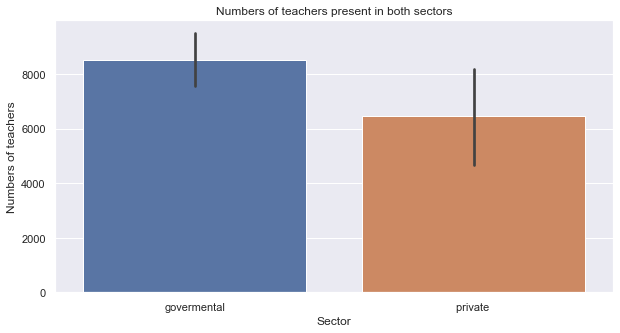

In [21]:
plt.figure(figsize = (10,5))
plt.title("Numbers of teachers present in both sectors")
sns.barplot(x='sector_EN',y='value', data=df_clean)
plt.xlabel('Sector')
plt.ylabel('Numbers of teachers')
plt.show()

In [22]:
new = df_clean[['sex_EN','value','sector_EN']]

C:\Users\Talha Khan\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


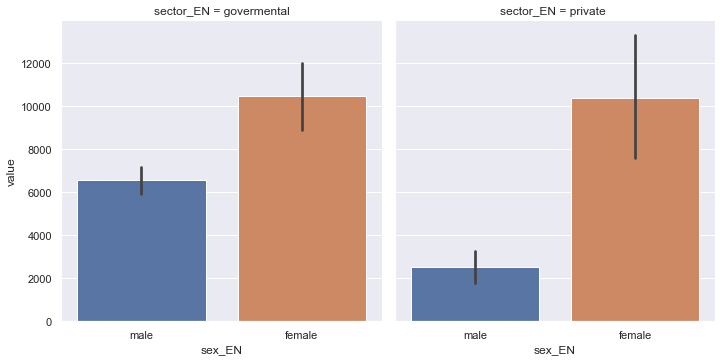

In [23]:
sns.factorplot(x='sex_EN',y='value', col='sector_EN', data=new, kind='bar')
plt.show();

In [24]:
# cleaning year (removing / in the 2000/1999)
li = []
for row in df_clean['year'].str.split('/'):
    li.append(row[0])
df_clean['clean_year'] = li

<ipython-input-24-6c40dc6094f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_year'] = li


In [25]:
df_clean.head()

,sector_EN,sex_EN,year,value,clean_year
0,govermental,male,1975 / 1974,2083,1975
1,govermental,female,1975 / 1974,1744,1975
4,govermental,male,1976 / 1975,2542,1976
5,govermental,female,1976 / 1975,2314,1976
6,private,male,1976 / 1975,92,1976


In [26]:
num_teacher_peryear=df_clean.groupby(['clean_year','sex_EN'])['value'].sum().reset_index()

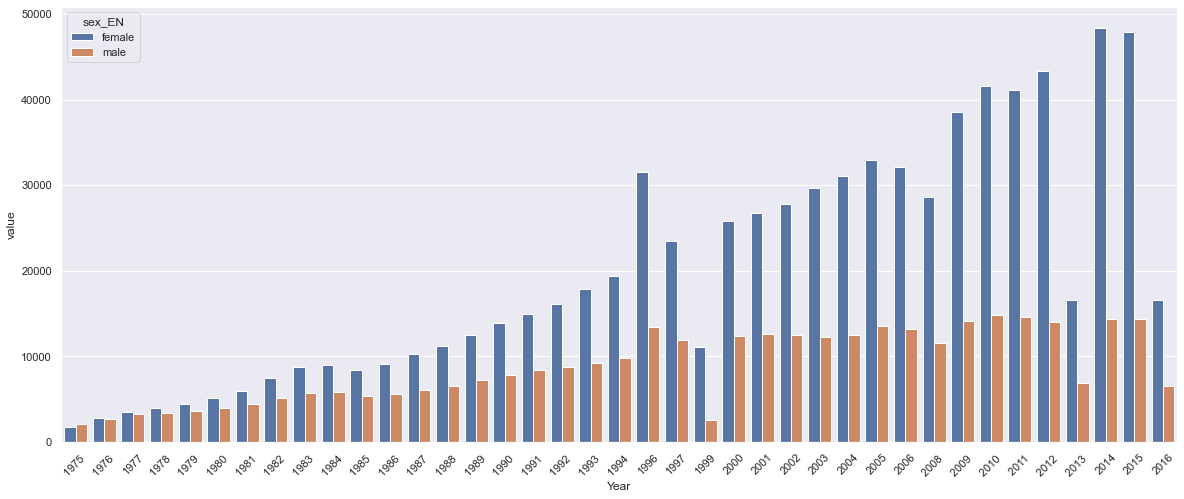

In [27]:
plt.figure(figsize = (20,8))
sns.barplot(x='clean_year',y='value',hue='sex_EN',data=num_teacher_peryear)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.show()

In [28]:
find_male = num_teacher_peryear[num_teacher_peryear['sex_EN']=='male'].sort_values(by='value').reset_index()

In [29]:
find_male.iloc[0:1]

,index,clean_year,sex_EN,value
0,1,1975,male,2083


In [30]:
teacher_peryear=df_clean.groupby(['clean_year','sector_EN'])['value'].sum().reset_index()

In [32]:
tech = teacher_peryear[teacher_peryear['sector_EN'] == 'private '].sort_values(by='value',ascending = True)

In [33]:
tech.iloc[0:1,:]

,clean_year,sector_EN,value
2,1976,private,533


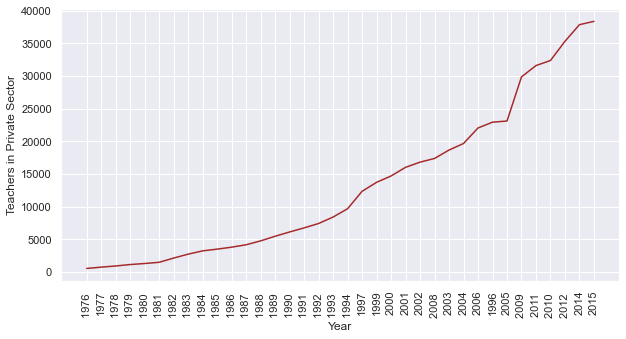

In [34]:
plt.figure(figsize = (10,5))
plt.plot(tech['clean_year'],tech['value'],color = 'brown')
plt.ylabel('Teachers in Private Sector')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show();

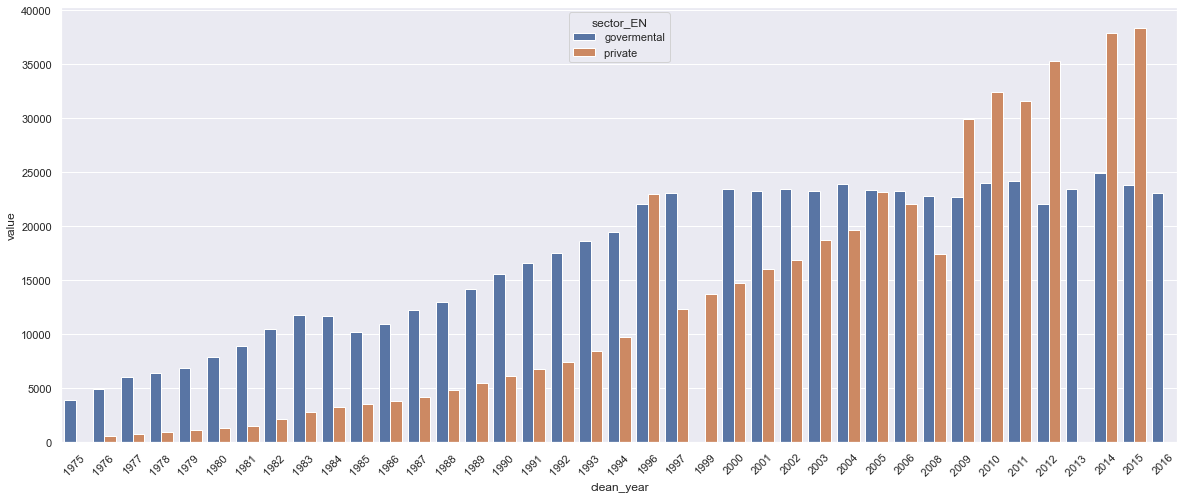

In [35]:
plt.figure(figsize = (20,8))
sns.barplot(x='clean_year',y='value',hue='sector_EN',data=teacher_peryear)
plt.xticks(rotation=45)
plt.show()

In [36]:
sort_teacher=df_clean.groupby(['clean_year','sex_EN'])['value'].sum().reset_index().sort_values(by='value',ascending=True)

In [37]:
sort_teacher.head()

,clean_year,sex_EN,value
0,1975,female,1744
1,1975,male,2083
45,1999,male,2599
3,1976,male,2634
2,1976,female,2755


C:\Users\Talha Khan\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


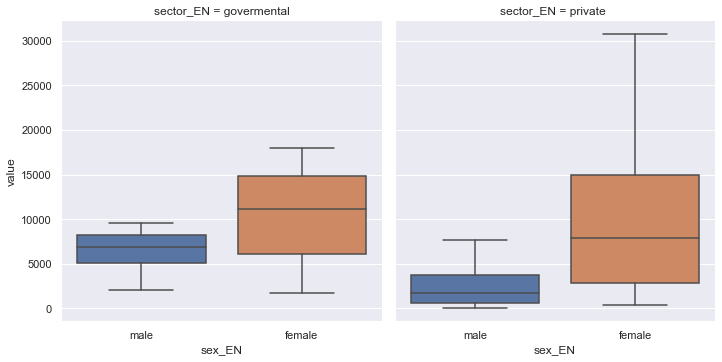

In [38]:
sns.factorplot(x='sex_EN',y='value', col='sector_EN', data=new, kind='box')